# Ejercicios de Procesamiento Digital de Imágenes

Ejercicio 1: Espacios de Color

Usando una imagen a color de su elección:

a) Cargar la imagen con OpenCV y mostrar los canales BGR por separado. 
b) Identificar cuál de los tres canales tiene mayor información basándose en los valores promedio. 
c) Convertir la imagen de BGR a RGB y explicar por qué los colores se ven diferentes antes y después de la conversión.

Ejercicio 2: Muestreo y Cuantización

a) Aplicar muestreo espacial a una imagen con factores de 2, 4 y 8. 
b) Para cada caso, calcular:
El nuevo tamaño de la imagen
El porcentaje de reducción de datos 
c) Aplicar cuantización con 4 niveles diferentes (32, 64, 128, 256) 
d) ¿En qué nivel de cuantización comienza a ser visible la degradación de la imagen?

Ejercicio 3: Segmentación por Color

Dada una imagen con objetos de diferentes colores:

a) Implementar una segmentación para extraer objetos de un color específico usando umbrales en los canales RGB. 
b) Calcular y mostrar el histograma de la imagen en escala de grises. 
c) Encontrar las coordenadas del rectángulo que encierra el objeto segmentado. 
d) Dibujar los bordes del objeto segmentado en color rojo.

Criterios de Evaluación:

Correcta implementación del código (40%)
Comprensión de los conceptos teóricos demostrada en las explicaciones (30%)
Análisis de resultados y conclusiones (20%)
Claridad en la presentación de resultados (10%)

In [1]:
!pip install scikit-image watermark -q

# Install OpenCV package first
!pip install opencv-python -q

# First install the required system library
!apt-get update && apt-get install -y libgl1-mesa-glx

!pip install opencv-python


[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Hit:1 http://deb.debian.org/debian bullseye InRelease
Hit:2 http://deb.debian.org/debian-security bullseye-security InRelease
Hit:3 http://deb.debian.org/debian bullseye-updates InRelease




libgl1-mesa-glx is already the newest version (20.3.5-1).
0 upgraded, 0 newly installed, 0 to remove and 51 not upgraded.

[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [2]:
import numpy as np
import cv2
from cv2 import imread
import matplotlib.pyplot as plt

## 1. Introducción a los Espacios de Color

Las imágenes digitales a color se pueden representar de diferentes maneras. Los dos espacios
de color más comunes en procesamiento digital de imágenes son:

- **RGB (Red, Green, Blue)**:
  - Usado por la mayoría de dispositivos de visualización
  - Cada pixel se representa con 3 valores (Rojo, Verde, Azul)
  - Valores típicos entre 0-255 por canal

- **BGR (Blue, Green, Red)**:
  - Formato utilizado por OpenCV
  - Misma estructura que RGB pero con orden invertido
  - Importante para evitar errores de interpretación

In [3]:
!wget https://i.pinimg.com/236x/9e/e0/93/9ee093c27cbaab7df2d7bdce90e4c11f.jpg

--2025-04-14 03:05:50--  https://i.pinimg.com/236x/9e/e0/93/9ee093c27cbaab7df2d7bdce90e4c11f.jpg
Resolving i.pinimg.com (i.pinimg.com)... 151.101.192.84, 151.101.0.84, 151.101.128.84, ...
Connecting to i.pinimg.com (i.pinimg.com)|151.101.192.84|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22291 (22K) [image/jpeg]
Saving to: ‘9ee093c27cbaab7df2d7bdce90e4c11f.jpg.1’

9ee093c27cbaab7df2d 100%[===================>]  21.77K  --.-KB/s    in 0.001s  

2025-04-14 03:05:50 (16.8 MB/s) - ‘9ee093c27cbaab7df2d7bdce90e4c11f.jpg.1’ saved [22291/22291]



## 2. Trabajando con OpenCV (cv2)

OpenCV es una biblioteca especializada en visión por computador y procesamiento de imágenes.
Características importantes:
- Utiliza formato BGR por defecto
- Eficiente en términos de procesamiento
- Ampliamente utilizada en aplicaciones de visión computacional

Dimensiones de la imagen: (419, 235, 3)
Tipo de datos: uint8
Tamaño en memoria (bytes): 295395


(-0.5, 234.5, 418.5, -0.5)

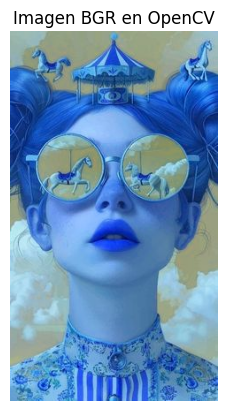

In [4]:
# Lectura de imagen usando OpenCV
imagen_bgr = cv2.imread('gafas2.jpg')

# Información básica de la imagen
print("Dimensiones de la imagen:", imagen_bgr.shape)
print("Tipo de datos:", imagen_bgr.dtype)
print("Tamaño en memoria (bytes):", imagen_bgr.nbytes)

# Visualización de la imagen completa
#cv2_imshow(imagen_bgr)
plt.imshow(imagen_bgr)
plt.title('Imagen BGR en OpenCV')
plt.axis('off')  # Muestra los ejes para referencia
#plt.colorbar()  # Añade barra de color
#plt.show()

### 2.1 Análisis de Canales BGR

Cada canal representa la intensidad de un color específico:
- Valores cercanos a 0 indican ausencia del color
- Valores cercanos a 255 indican máxima intensidad

Estadísticas del canal Azul:
Valor mínimo: 0, Valor máximo: 205, Promedio: 93.38


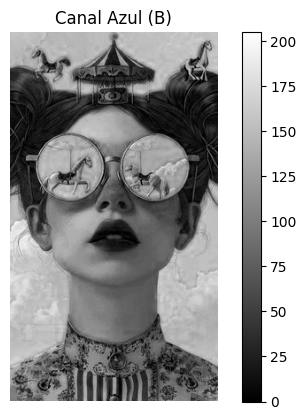

In [5]:
# Canal Azul (B)
B = imagen_bgr[:,:,0]
print("Estadísticas del canal Azul:")
print(f"Valor mínimo: {B.min()}, Valor máximo: {B.max()}, Promedio: {B.mean():.2f}")

# Using plt.imshow() instead of cv2_imshow since we're working with matplotlib
plt.figure()
plt.imshow(B, cmap='gray')  # Use grayscale colormap for single channel
plt.title('Canal Azul (B)')
plt.colorbar()  # Add colorbar to show intensity values
plt.axis('off')
plt.show()


Estadísticas del canal Verde:
Valor mínimo: 3, Valor máximo: 249, Promedio: 136.81


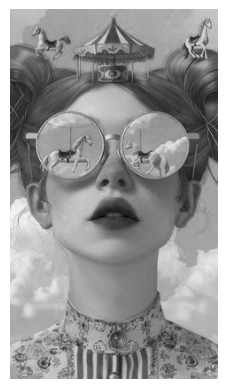

In [6]:
# Canal Verde (G)
G = imagen_bgr[:,:,1]
print("\nEstadísticas del canal Verde:")
print(f"Valor mínimo: {G.min()}, Valor máximo: {G.max()}, Promedio: {G.mean():.2f}")
#cv2_imshow(G) utilizo plt.imshow() para mostrar la imagen porque estoy trabajando con Deepnote

# Using plt.imshow() instead of cv2_imshow since we're working with matplotlib
plt.figure()
plt.axis('off')
plt.imshow(G, cmap='gray')  # Use grayscale colormap for single channel


Estadísticas del canal Rojo:
Valor mínimo: 49, Valor máximo: 255, Promedio: 179.67


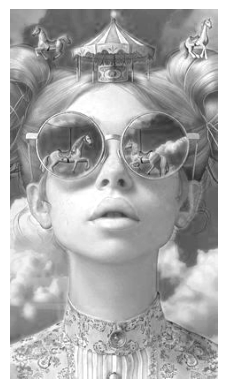

In [7]:
# Canal Rojo (R)
R = imagen_bgr[:,:,2]
print("\nEstadísticas del canal Rojo:")
print(f"Valor mínimo: {R.min()}, Valor máximo: {R.max()}, Promedio: {R.mean():.2f}")
#cv2_imshow(R) no funciona porque estoy usando Deepnote
# Using plt.imshow() instead of cv2_imshow since we're working with matplotlib
plt.figure()
plt.axis('off')
plt.imshow(R, cmap='gray')  # Use grayscale colormap for single channel

## 3. Trabajando con Matplotlib

Matplotlib ofrece funcionalidades más avanzadas de visualización:
- Usa formato RGB por defecto
- Permite personalización detallada de gráficos
- Ideal para presentación y análisis visual

In [8]:
import matplotlib.pyplot as plt

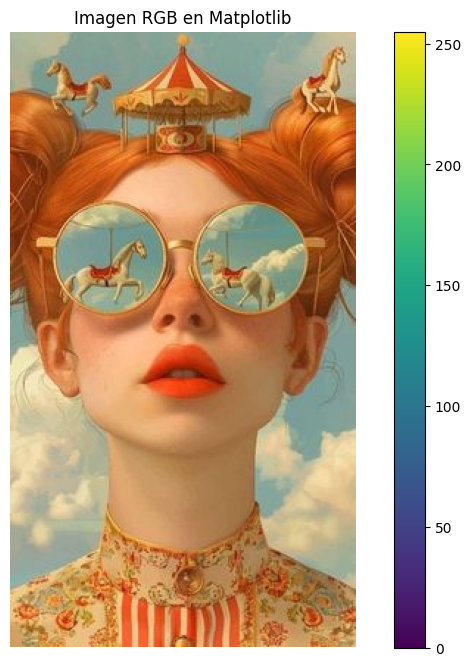

In [9]:
# Lectura y visualización con Matplotlib
imagen_rgb = plt.imread('gafas2.jpg')
plt.figure(figsize=(10,8))
plt.imshow(imagen_rgb)
plt.title('Imagen RGB en Matplotlib')
plt.axis('off')  # On Matplotlib, Muestra los ejes para referencia Off no muestra los ejes
plt.colorbar()  # Añade barra de color
plt.show()

### 3.1 Visualización Detallada de Canales RGB

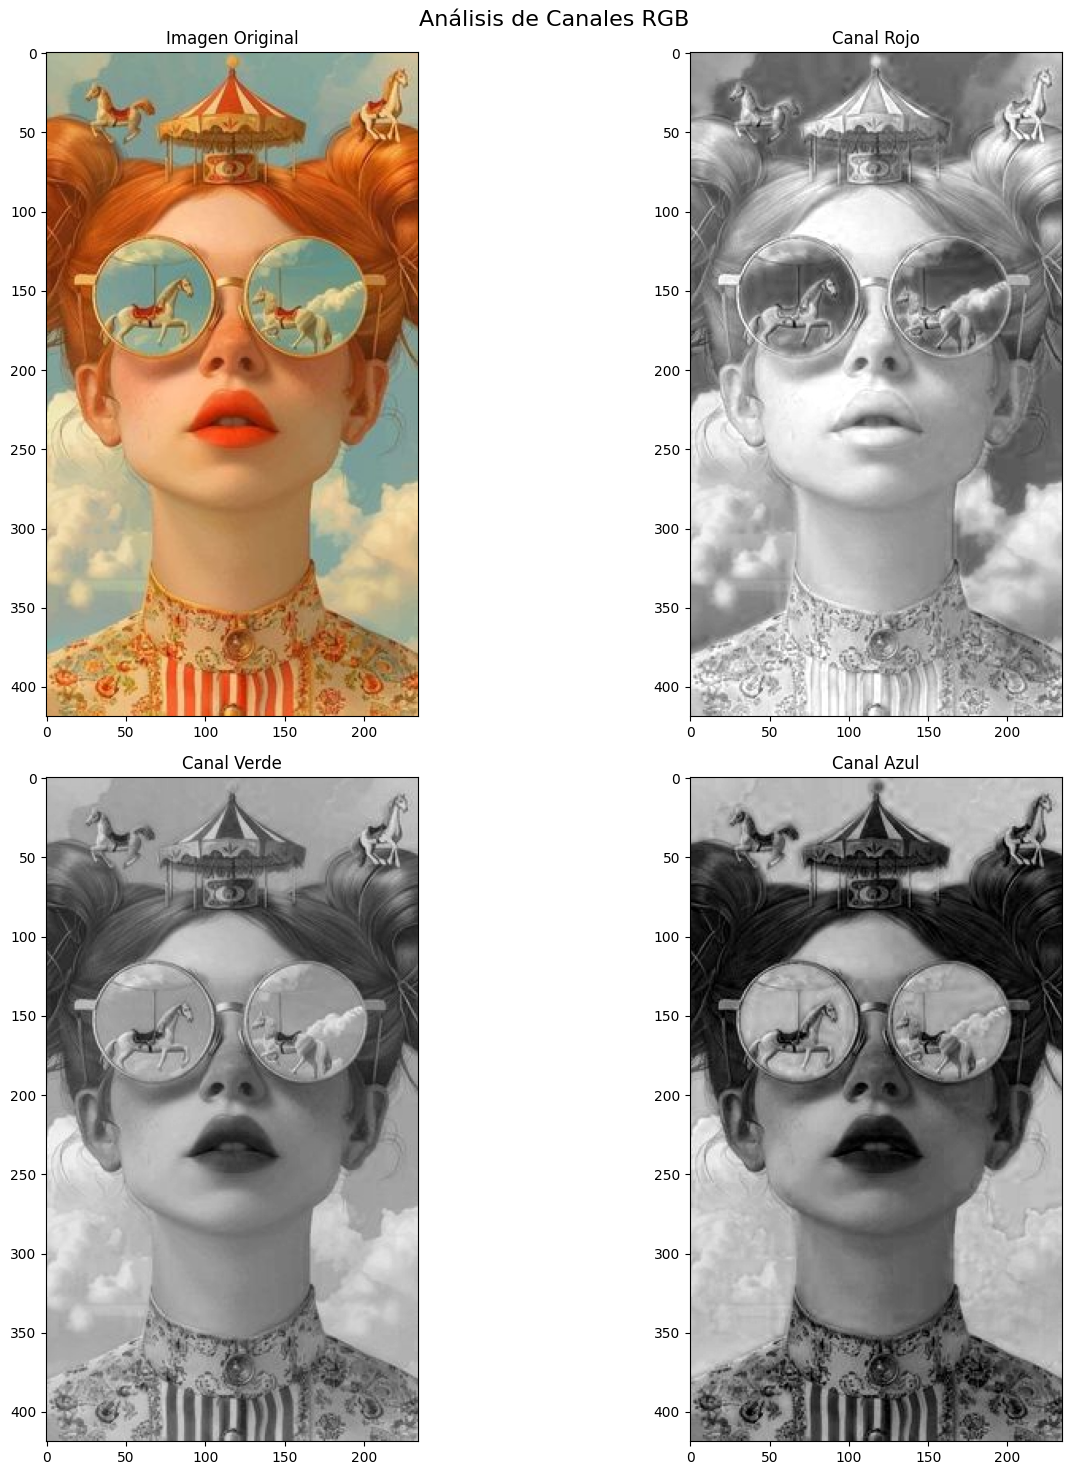

In [10]:
# Configuración de subplots
fig, axes = plt.subplots(2, 2, figsize=(15,15))
fig.suptitle('Análisis de Canales RGB', fontsize=16)

# Imagen Original
axes[0,0].imshow(imagen_rgb)
axes[0,0].set_title('Imagen Original')

# Canal Rojo
axes[0,1].imshow(imagen_rgb[:,:,0], cmap='gray')
axes[0,1].set_title('Canal Rojo')

# Canal Verde
axes[1,0].imshow(imagen_rgb[:,:,1], cmap='gray')
axes[1,0].set_title('Canal Verde')

# Canal Azul
axes[1,1].imshow(imagen_rgb[:,:,2], cmap='gray')
axes[1,1].set_title('Canal Azul')

plt.tight_layout()
plt.show()


## 4. Conversión entre Espacios de Color

Es crucial entender cómo convertir entre BGR y RGB:
- Evita errores de interpretación
- Permite usar correctamente ambas bibliotecas

In [11]:
# Demostración de conversión BGR a RGB
imagen_bgr = cv2.imread('gafas2.jpg')
imagen_rgb = cv2.cvtColor(imagen_bgr, cv2.COLOR_BGR2RGB)

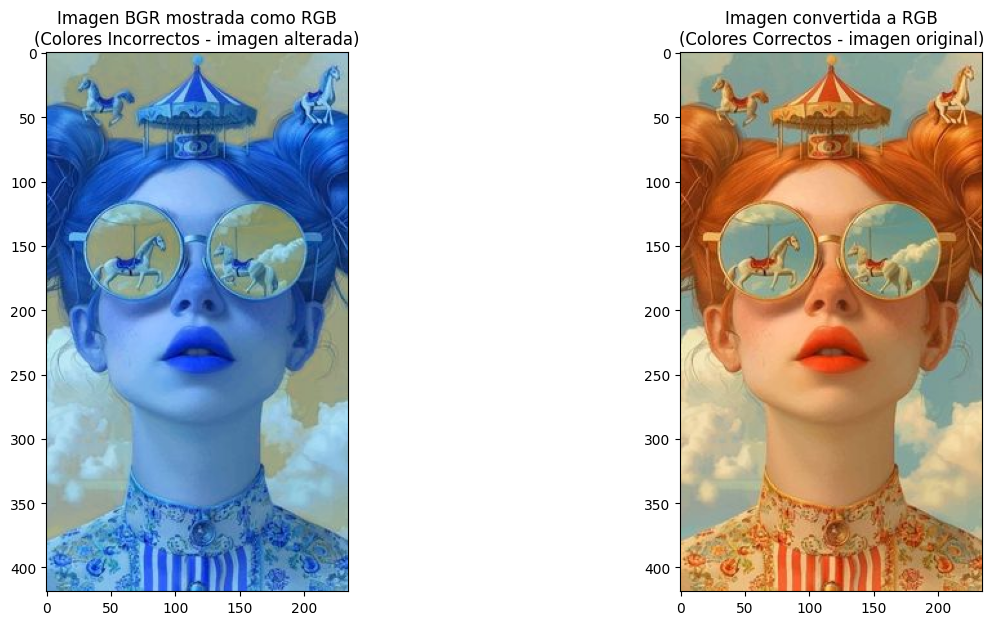

In [12]:
# Visualización comparativa
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,7))

ax1.imshow(imagen_bgr)
ax1.set_title('Imagen BGR mostrada como RGB\n(Colores Incorrectos - imagen alterada)')

ax2.imshow(imagen_rgb)
ax2.set_title('Imagen convertida a RGB\n(Colores Correctos - imagen original)')

plt.show()

## 5. Resumen y Conceptos Clave

### Puntos Importantes:
1. **Espacios de Color**:
   - RGB: Estándar en visualización
   - BGR: Estándar en OpenCV
   
2. **Bibliotecas**:
   - OpenCV: Orientado a procesamiento
   - Matplotlib: Orientado a visualización

3. **Buenas Prácticas**:
   - Verificar siempre el espacio de color
   - Usar las funciones de conversión adecuadas
   - Documentar el formato usado en cada paso

### Ejercicios Sugeridos:
1. Cargar una imagen propia y analizar sus canales
2. Experimentar con diferentes mapas de color en Matplotlib
3. Practicar conversiones entre BGR y RGB

## Prueba visual compacta de todas las imágenes

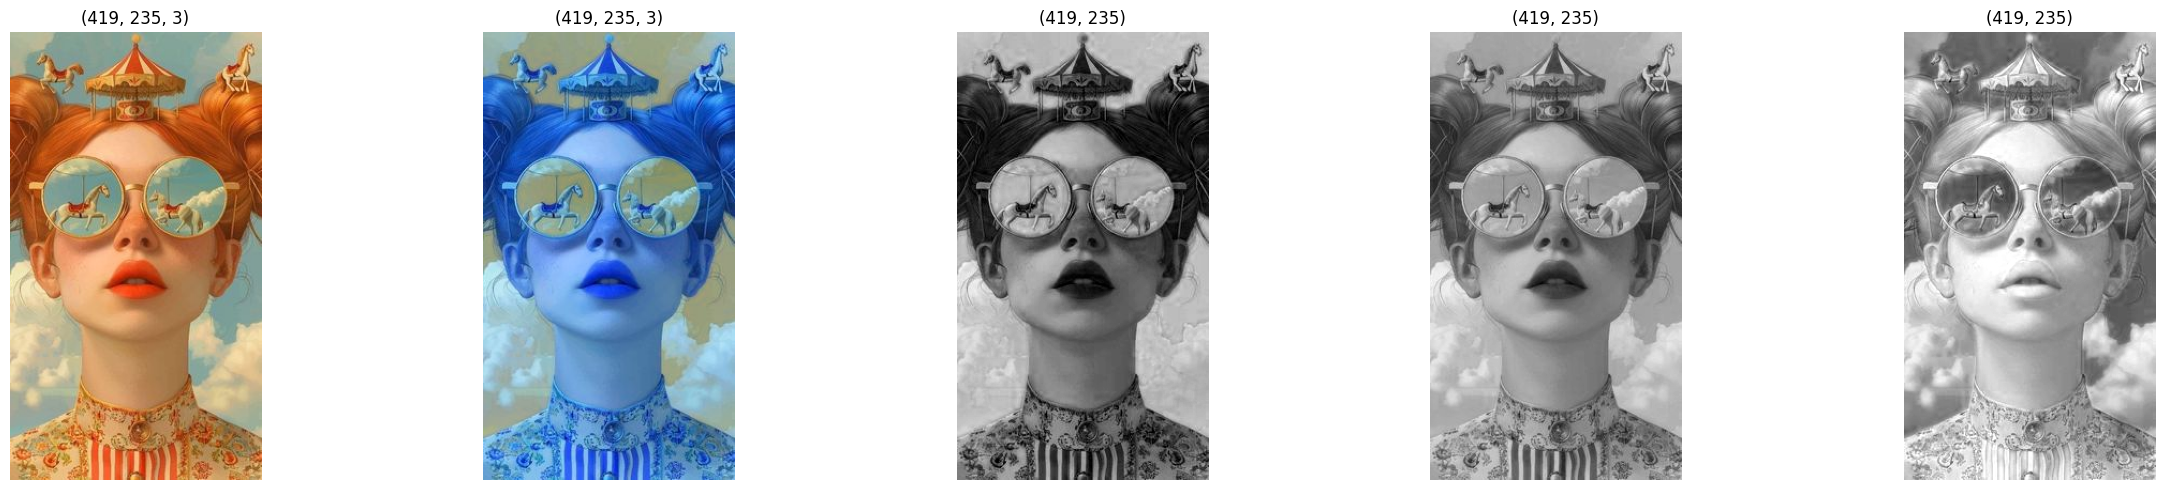

In [13]:
plt.figure(figsize=(25, 5))  # Aumentamos el ancho por tener 5 imágenes

plt.subplot(1, 5, 1)
plt.imshow(imagen_rgb, cmap='gray')
plt.title(f'{imagen_rgb.shape}')
plt.axis("off")

plt.subplot(1, 5, 2)
plt.imshow(imagen_bgr, cmap='gray')
plt.title(f'{imagen_bgr.shape}')
plt.axis("off")

plt.subplot(1, 5, 3)
plt.imshow(B, cmap='gray')
plt.title(f'{B.shape}')
plt.axis("off")

plt.subplot(1, 5, 4)
plt.imshow(G, cmap='gray')
plt.title(f'{G.shape}')
plt.axis("off")

plt.subplot(1, 5, 5)
plt.imshow(R, cmap='gray')
plt.title(f'{R.shape}')
plt.axis("off")

plt.tight_layout()
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=9be9d3e5-4f25-48e6-912d-b59b8644d952' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>